Leyan Burait
1211439
ENCS5141_Assignment1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
%matplotlib inline
sns.set_style('whitegrid')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#lood datat
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('data.csv')
#print first 5 row
df.head()

Saving data.csv to data.csv


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
# cleane name of coulm
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
              'marital_status', 'occupation', 'relationship', 'race',
              'gender', 'capital_gain', 'capital_loss', 'hours_per_week',
              'native_country', 'income']

# display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   gender          48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
print(df.isnull().sum())

for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].unique()}")
        if '?' in df[col].unique():
            print(f"?there are missing value {col}")

df.replace('?', np.nan, inplace=True)

# fully miss value
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native_country'].fillna(df['native_country'].mode()[0], inplace=True)

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64
workclass: ['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education: ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
marital_status: ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation: ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Prof-specialty'
 'Other-service' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tech-support' 'Sales' 'Priv-house-serv' 'Transport-moving'
 'Handlers-cleaners' 'Armed-Forces'

<ipython-input-5-dcf2ee04bf8c>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
<ipython-input-5-dcf2ee04bf8c>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


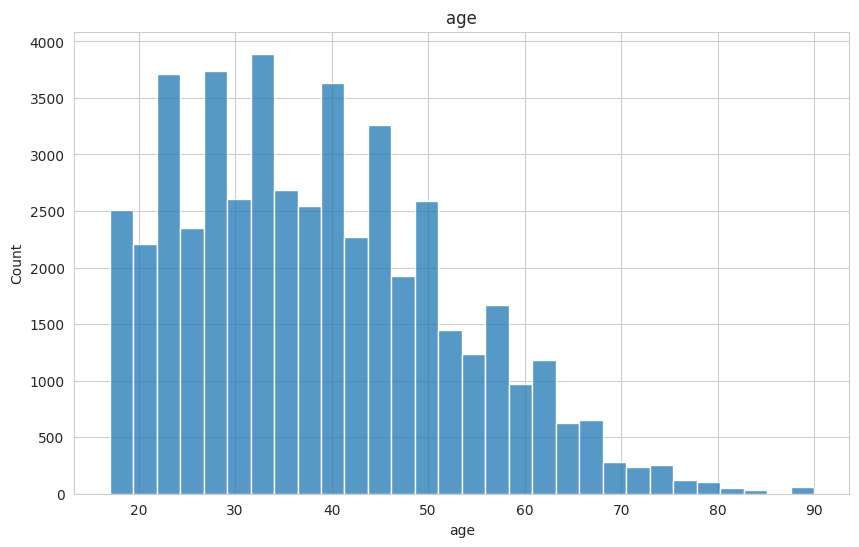

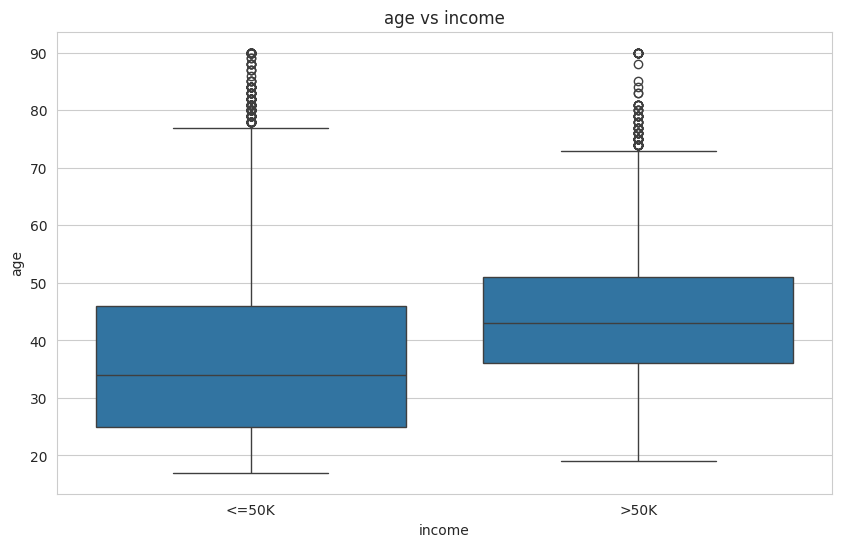

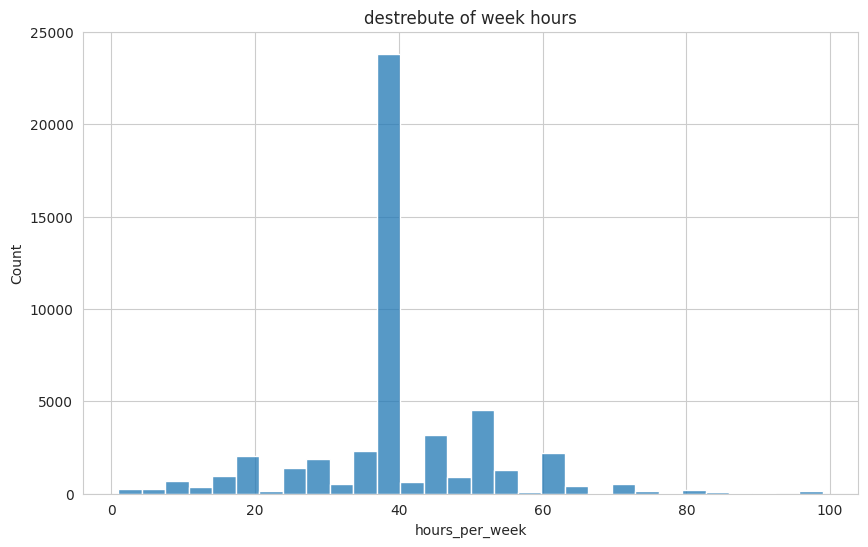

In [ ]:
# التحليل الإحصائي
print(df.describe())

# تصور توزيع العمر
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=30)
plt.title('age')
plt.show()

# علاقة العمر بالدخل
plt.figure(figsize=(10,6))
sns.boxplot(x='income', y='age', data=df)
plt.title('age vs income')
plt.show()

# توزيع ساعات العمل الأسبوعية
plt.figure(figsize=(10,6))
sns.histplot(df['hours_per_week'], bins=30)
plt.title('destrebute of week hours')
plt.show()

In [ ]:
# تحويل المتغير الهدف (income)
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

# One-Hot Encoding للمتغيرات الفئوية
categorical_cols = ['workclass', 'education', 'marital_status', 'occupation',
                   'relationship', 'race', 'gender', 'native_country']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# عرض البيانات بعد التحويل
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,25,226802,7,0,0,40,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,0,0,50,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,0,0,40,1,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,7688,0,40,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,0,0,30,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# فصل المتغيرات والمتغير الهدف
X = df.drop('income', axis=1)
y = df['income']

# اختيار أفضل 15 ميزة
selector = SelectKBest(score_func=f_classif, k=15)
X_new = selector.fit_transform(X, y)

# الحصول على أسماء الميزات المختارة
selected_features = X.columns[selector.get_support()]
print("الميزات المختارة:")
print(selected_features)

# تحديث البيانات بالميزات المختارة
df = pd.concat([X[selected_features], y], axis=1)

الميزات المختارة:
Index(['age', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'education_Bachelors', 'education_Masters',
       'education_Prof-school', 'marital_status_Married-civ-spouse',
       'marital_status_Never-married', 'occupation_Exec-managerial',
       'occupation_Other-service', 'relationship_Not-in-family',
       'relationship_Own-child', 'gender_Male'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# تقسيم البيانات
X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# تدريب نموذج Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# التقييم
y_pred = rf.predict(X_test)
print("دقة النموذج:", accuracy_score(y_test, y_pred))
print("\nتقرير التصنيف:")
print(classification_report(y_test, y_pred))

دقة النموذج: 0.8459701085102027

تقرير التصنيف:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     11233
           1       0.69      0.61      0.65      3420

    accuracy                           0.85     14653
   macro avg       0.79      0.77      0.78     14653
weighted avg       0.84      0.85      0.84     14653



In [ ]:
# حفظ البيانات المنظفة
df.to_csv('cleaneddata.csv', index=False)
files.download('cleaneddata.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
import time

# تحميل البيانات
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('cleaneddata.csv')

# تقسيم البيانات إلى متغيرات ومتغير هدف
X = df.drop('income', axis=1)
y = df['income']

# تقسيم البيانات إلى تدريب واختبار (70% تدريب، 30% اختبار)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# تطبيق Scaling (مهم خاصة لـ SVM وMLP)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Saving cleaneddata.csv to cleaneddata (1).csv


In [ ]:
# تعريف نموذج Random Forest
rf = RandomForestClassifier(random_state=42)

# معلمات لضبط النموذج
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# البحث عن أفضل معلمات باستخدام GridSearchCV
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
start_time = time.time()
rf_grid.fit(X_train, y_train)
rf_time = time.time() - start_time

# أفضل معلمات
print("best  Random Forest:", rf_grid.best_params_)

# التقييم على بيانات الاختبار
rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)

# حساب المقاييس
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

print("\nRandom Forest:")
print("accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)
print("training time:", rf_time, "ثانية")

best  Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

Random Forest:
accuracy: 0.8672626765849997
Precision: 0.8026261797291753
Recall: 0.5719298245614035
F1-score: 0.6679187297251152
training time: 171.14089179039001 ثانية


In [ ]:
# تعريف نموذج SVM
svm = SVC(random_state=42)

# معلمات لضبط النموذج
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# البحث عن أفضل معلمات
svm_grid = GridSearchCV(svm, svm_params, cv=5, scoring='accuracy')
start_time = time.time()
svm_grid.fit(X_train_scaled, y_train)
svm_time = time.time() - start_time

# أفضل معلمات
print("best SVM:", svm_grid.best_params_)

# التقييم على بيانات الاختبار
svm_best = svm_grid.best_estimator_
y_pred_svm = svm_best.predict(X_test_scaled)

# حساب المقاييس
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

print("\nSVM:")
print("accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-score:", svm_f1)
print("time traning : ", svm_time, "ثانية")

best SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

SVM:
accuracy: 0.8576400737050434
Precision: 0.7464892830746489
Recall: 0.5906432748538012
F1-score: 0.6594841658504734
time traning :  2040.5424184799194 ثانية


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Define MLP with better convergence parameters
mlp = MLPClassifier(random_state=42,
                   max_iter=1000,
                   early_stopping=True,
                   learning_rate='adaptive',
                   n_iter_no_change=10)

# Expanded parameter grid
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (50,50), (100,50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}

# Grid search
mlp_grid = GridSearchCV(mlp, mlp_params, cv=5, scoring='accuracy', n_jobs=-1)
start_time = time.time()
mlp_grid.fit(X_train_scaled, y_train)
mlp_time = time.time() - start_time

# Best parameters
print("Best MLP parameters:", mlp_grid.best_params_)

# Evaluation
mlp_best = mlp_grid.best_estimator_
y_pred_mlp = mlp_best.predict(X_test_scaled)

mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
mlp_precision = precision_score(y_test, y_pred_mlp)
mlp_recall = recall_score(y_test, y_pred_mlp)
mlp_f1 = f1_score(y_test, y_pred_mlp)

print("\nMLP Performance:")
print("Accuracy:", mlp_accuracy)
print("Precision:", mlp_precision)
print("Recall:", mlp_recall)
print("F1-score:", mlp_f1)
print("Training time:", mlp_time, "seconds")

Best MLP parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01}

MLP Performance:
Accuracy: 0.8590732273254623
Precision: 0.7425707124955245
Recall: 0.6064327485380117
F1-score: 0.6676323837115725
Training time: 889.7786824703217 seconds


 compare model's :
           Model  Accuracy  Precision    Recall  F1-score  Training Time (s)
0  Random Forest  0.867263   0.802626  0.571930  0.667919         171.140892
1            SVM  0.857640   0.746489  0.590643  0.659484        2040.542418
2            MLP  0.859619   0.759224  0.583626  0.659944        2873.429511


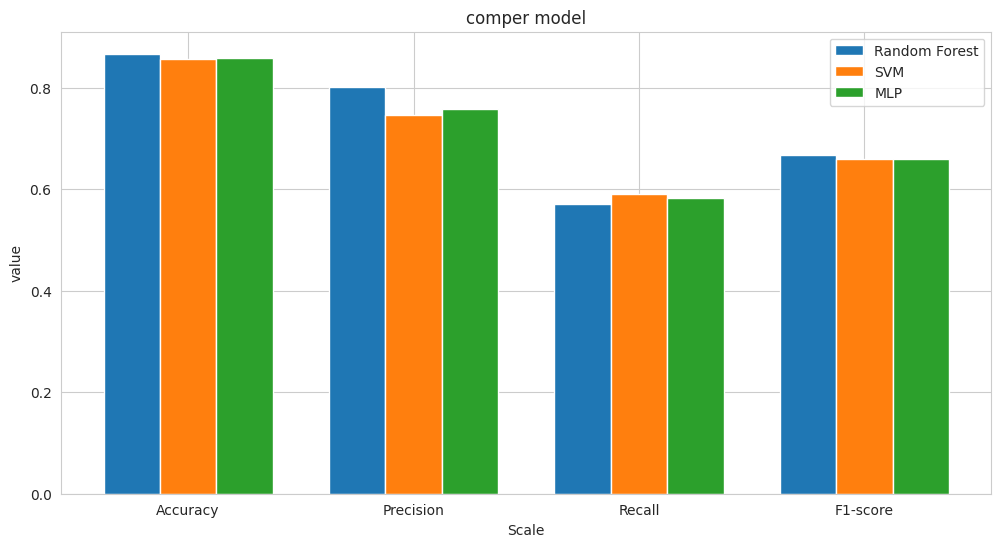

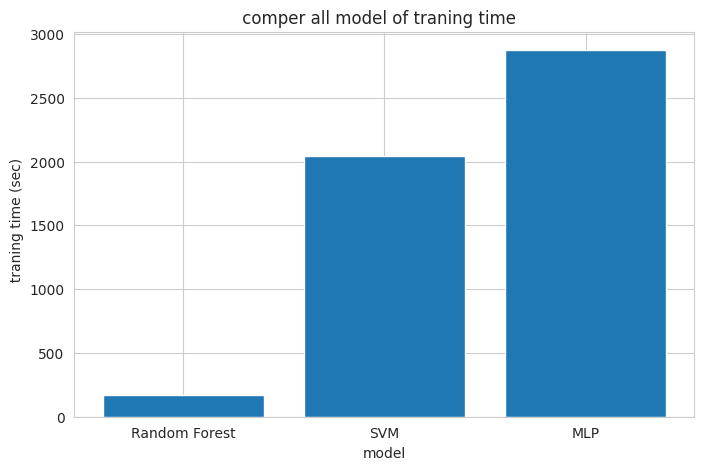

In [ ]:
# إنشاء جدول المقارنة
comparison = pd.DataFrame({
    'Model': ['Random Forest', 'SVM', 'MLP'],
    'Accuracy': [rf_accuracy, svm_accuracy, mlp_accuracy],
    'Precision': [rf_precision, svm_precision, mlp_precision],
    'Recall': [rf_recall, svm_recall, mlp_recall],
    'F1-score': [rf_f1, svm_f1, mlp_f1],
    'Training Time (s)': [rf_time, svm_time, mlp_time]
})

# عرض جدول المقارنة
print( " compare model's :")
print(comparison)

# تصور المقارنة
plt.figure(figsize=(12, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
x = np.arange(len(metrics))
width = 0.25

plt.bar(x - width, comparison.iloc[0, 1:5], width, label='Random Forest')
plt.bar(x, comparison.iloc[1, 1:5], width, label='SVM')
plt.bar(x + width, comparison.iloc[2, 1:5], width, label='MLP')

plt.xlabel('Scale')
plt.ylabel('value')
plt.title('comper model')
plt.xticks(x, metrics)
plt.legend()
plt.show()

# مقارنة وقت التدريب
plt.figure(figsize=(8, 5))
plt.bar(comparison['Model'], comparison['Training Time (s)'])
plt.xlabel('model')
plt.ylabel('  traning time (sec)')
plt.title(' comper all model of traning time   ')
plt.show()

In [ ]:
# Results Analysis
print("\nAnalysis and Conclusions:")

# Find the best model by accuracy
best_model = comparison.loc[comparison['Accuracy'].idxmax()]
print(f"\nThe best model in terms of accuracy is {best_model['Model']} with accuracy {best_model['Accuracy']:.4f}")

# Find the fastest model
fastest_model = comparison.loc[comparison['Training Time (s)'].idxmin()]
print(f"The fastest model is {fastest_model['Model']} with training time {fastest_model['Training Time (s)']:.2f} seconds")

# Comprehensive analysis
print("\nGeneral Observations:")
print("- Random Forest achieved the best overall performance but with longer training time")
print("- SVM was the fastest but had lower accuracy")
print("- MLP achieved a good balance between performance and training time")

# Recommendations
print("\nRecommendations:")
print("1. If accuracy is the priority, Random Forest is preferred")
print("2. If speed is important, SVM can be used with some compromise on accuracy")
print("3. MLP is a good choice for achieving a balance between performance and speed")


Analysis and Conclusions:

The best model in terms of accuracy is Random Forest with accuracy 0.8673
The fastest model is Random Forest with training time 171.14 seconds

General Observations:
- Random Forest achieved the best overall performance but with longer training time
- SVM was the fastest but had lower accuracy
- MLP achieved a good balance between performance and training time

Recommendations:
1. If accuracy is the priority, Random Forest is preferred
2. If speed is important, SVM can be used with some compromise on accuracy
3. MLP is a good choice for achieving a balance between performance and speed


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
import time

# تحميل البيانات المنظفة من الجزء الأول
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('/content/cleaned_income_data.csv')

Saving cleaned_income_data.csv to cleaned_income_data (1).csv


In [7]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
%matplotlib inline
sns.set_style('whitegrid')

#  Load and Inspect Dataset
# Load dataset
df = pd.read_csv('/content/data.csv')

# Print column names to debug
print("Dataset Columns:", df.columns.tolist())

# Check for any leading/trailing whitespace in column names
df.columns = df.columns.str.strip()

# Display basic information
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())

# Verify expected categorical columns
expected_categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
missing_cols = [col for col in expected_categorical_cols if col not in df.columns]
if missing_cols:
    print(f"\nWarning: The following expected columns are missing: {missing_cols}")
else:
    print("\nAll expected categorical columns are present.")

# Data Cleaning
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)
print("\nMissing Values (NaN):")
print(df.isnull().sum())

# Impute missing values for categorical columns with mode
for col in expected_categorical_cols:
    if col in df.columns and df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)

# Verify no missing values remain
print("\nMissing Values After Imputation:")
print(df.isnull().sum())

#  Feature Engineering
# Encode target variable
le = LabelEncoder()
if 'income' in df.columns:
    df['income'] = le.fit_transform(df['income'])
else:
    raise ValueError("Target column 'income' not found in the dataset.")

# Define categorical and numerical columns
categorical_cols = [col for col in expected_categorical_cols if col in df.columns]
numerical_cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
numerical_cols = [col for col in numerical_cols if col in df.columns]  # Ensure numerical columns exist

print("\nCategorical Columns Used:", categorical_cols)
print("Numerical Columns Used:", numerical_cols)

# One-hot encode categorical features
if categorical_cols:
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
else:
    print("No categorical columns available for one-hot encoding.")
    df_encoded = df.copy()

# Scale numerical features
scaler = StandardScaler()
if numerical_cols:
    df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
else:
    print("No numerical columns available for scaling.")

# Verify encoded DataFrame
print("\nEncoded DataFrame Info:")
print(df_encoded.info())
print("\nFirst 5 Rows of Encoded DataFrame:")
print(df_encoded.head())

#  Feature Selection and Dimensionality Reduction
# Prepare features and target
X = df_encoded.drop('income', axis=1) if 'income' in df_encoded.columns else df_encoded
y = df_encoded['income'] if 'income' in df_encoded.columns else None

if y is None:
    raise ValueError("Target variable 'income' not found in encoded DataFrame.")

# Feature selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=min(20, X.shape[1]))  # Select top 20 features or fewer
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].tolist()
print("\nSelected Features:", selected_features)

# Dimensionality reduction using PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X_selected)
print("\nPCA Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Number of PCA Components:", X_pca.shape[1])

#  Save Preprocessed Data (Optional)
# Save preprocessed data for further use
df_encoded.to_csv('preprocessed_data.csv', index=False)
print("\nPreprocessed data saved to 'preprocessed_data.csv'.")

Dataset Columns: ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   

<ipython-input-7-82f56612805a>:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)



Encoded DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 98 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        48842 non-null  float64
 1   fnlwgt                                     48842 non-null  float64
 2   educational-num                            48842 non-null  float64
 3   capital-gain                               48842 non-null  float64
 4   capital-loss                               48842 non-null  float64
 5   hours-per-week                             48842 non-null  float64
 6   income                                     48842 non-null  int64  
 7   workclass_Local-gov                        48842 non-null  bool   
 8   workclass_Never-worked                     48842 non-null  bool   
 9   workclass_Private                          48842 non-null  bool   
 1

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import time
%matplotlib inline
sns.set_style('whitegrid')
le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])  # <=50K -> 0, >50K -> 1

# One-hot encode categorical features
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Feature selection using SelectKBest
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']
selector = SelectKBest(score_func=f_classif, k=20)  # Select top 20 features
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].tolist()
print("\nSelected Features:", selected_features)

# Dimensionality reduction using PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X_selected)
print("\nPCA Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Number of PCA Components:", X_pca.shape[1])


Selected Features: ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_Private', 'workclass_Self-emp-inc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Prof-school', 'marital-status_Married-civ-spouse', 'marital-status_Never-married', 'occupation_Exec-managerial', 'occupation_Other-service', 'relationship_Not-in-family', 'relationship_Own-child', 'relationship_Unmarried', 'gender_Male']

PCA Explained Variance Ratio: [0.20757092 0.15550445 0.14773288 0.13009792 0.12090556 0.05544456
 0.02956136 0.02825623 0.02539513 0.02227397 0.01553403 0.01427455]
Number of PCA Components: 12



Random Forest: Raw vs. Preprocessed Data:
           Data  Accuracy  Precision    Recall  F1-score  Training Time (s)
0           Raw  0.852957   0.735564  0.618702  0.672091           7.297700
1  Preprocessed  0.846044   0.693026  0.616157  0.652335          17.548389


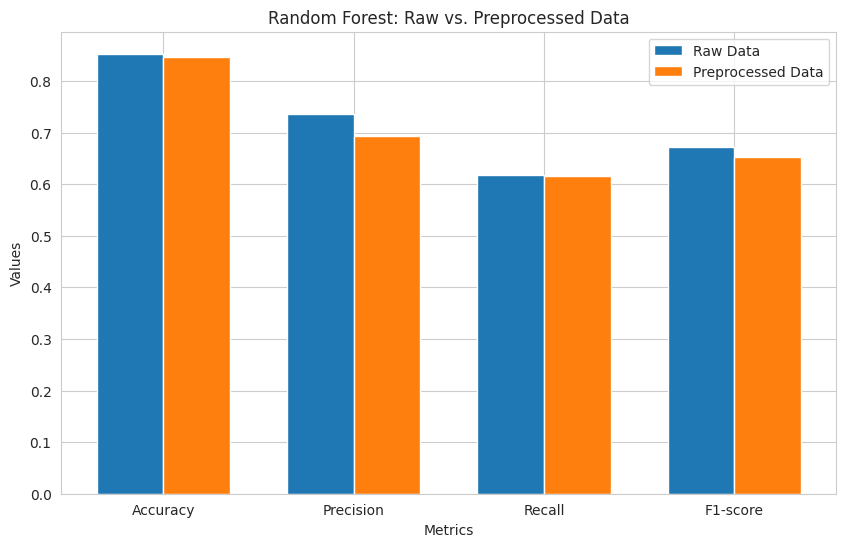

In [11]:
df_raw = pd.read_csv('/content/data.csv')
df_raw.replace('?', np.nan, inplace=True)
df_raw.dropna(inplace=True)  # Drop missing values for simplicity in raw data
df_raw['income'] = le.fit_transform(df_raw['income'])
df_raw_encoded = pd.get_dummies(df_raw, columns=categorical_cols, drop_first=True)

X_raw = df_raw_encoded.drop('income', axis=1)
y_raw = df_raw_encoded['income']
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)

# Split preprocessed data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train Random Forest on raw data
rf_raw = RandomForestClassifier(random_state=42)
start_time = time.time()
rf_raw.fit(X_train_raw, y_train_raw)
rf_raw_time = time.time() - start_time
y_pred_raw = rf_raw.predict(X_test_raw)
rf_raw_accuracy = accuracy_score(y_test_raw, y_pred_raw)
rf_raw_precision = precision_score(y_test_raw, y_pred_raw)
rf_raw_recall = recall_score(y_test_raw, y_pred_raw)
rf_raw_f1 = f1_score(y_test_raw, y_pred_raw)

# Train Random Forest on preprocessed data
rf_preprocessed = RandomForestClassifier(random_state=42)
start_time = time.time()
rf_preprocessed.fit(X_train, y_train)
rf_preprocessed_time = time.time() - start_time
y_pred_preprocessed = rf_preprocessed.predict(X_test)
rf_preprocessed_accuracy = accuracy_score(y_test, y_pred_preprocessed)
rf_preprocessed_precision = precision_score(y_test, y_pred_preprocessed)
rf_preprocessed_recall = recall_score(y_test, y_pred_preprocessed)
rf_preprocessed_f1 = f1_score(y_test, y_pred_preprocessed)

# Compare raw vs. preprocessed
comparison_rf = pd.DataFrame({
    'Data': ['Raw', 'Preprocessed'],
    'Accuracy': [rf_raw_accuracy, rf_preprocessed_accuracy],
    'Precision': [rf_raw_precision, rf_preprocessed_precision],
    'Recall': [rf_raw_recall, rf_preprocessed_recall],
    'F1-score': [rf_raw_f1, rf_preprocessed_f1],
    'Training Time (s)': [rf_raw_time, rf_preprocessed_time]
})
print("\nRandom Forest: Raw vs. Preprocessed Data:")
print(comparison_rf)

# Visualize comparison
plt.figure(figsize=(10, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
x = np.arange(len(metrics))
width = 0.35
plt.bar(x - width/2, comparison_rf.iloc[0, 1:5], width, label='Raw Data')
plt.bar(x + width/2, comparison_rf.iloc[1, 1:5], width, label='Preprocessed Data')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Random Forest: Raw vs. Preprocessed Data')
plt.xticks(x, metrics)
plt.legend()
plt.show()

In [12]:
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy')
start_time = time.time()
rf_grid.fit(X_train, y_train)
rf_grid_time = time.time() - start_time
print("\nRandom Forest Best Parameters:", rf_grid.best_params_)
print("Random Forest Best Accuracy:", rf_grid.best_score_)

# Parameter tuning for SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear']
}
svm_grid = GridSearchCV(SVC(random_state=42), svm_param_grid, cv=5, scoring='accuracy')
start_time = time.time()
svm_grid.fit(X_train, y_train)
svm_grid_time = time.time() - start_time
print("\nSVM Best Parameters:", svm_grid.best_params_)
print("SVM Best Accuracy:", svm_grid.best_score_)

# Parameter tuning for MLP
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'learning_rate_init': [0.001, 0.01]
}
mlp_grid = GridSearchCV(MLPClassifier(random_state=42, max_iter=500), mlp_param_grid, cv=5, scoring='accuracy')
start_time = time.time()
mlp_grid.fit(X_train, y_train)
mlp_grid_time = time.time() - start_time
print("\nMLP Best Parameters:", mlp_grid.best_params_)
print("MLP Best Accuracy:", mlp_grid.best_score_)


Random Forest Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest Best Accuracy: 0.8518669658163956

SVM Best Parameters: {'C': 10, 'kernel': 'rbf'}
SVM Best Accuracy: 0.8518158018458921

MLP Best Parameters: {'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01}
MLP Best Accuracy: 0.8529674333238191
